# Ejercicio biosanitario: Diabetes (Pima) — Carga, limpieza y exportación

*Actualizado: 05/10/2025*

Pasos:
1) Cargar dataset desde URL.
2) Limpiar (ceros→NaN en variables clínicas, imputación mediana, duplicados, nombres).
3) Crear `bmi_cat` y `glucose_cat`.
4) Guardar en CSV y Excel e imprimir resumen.

> Aviso: categorías de glucosa solo educativas; no usar clínicamente.


## 0) Preparación

In [1]:
!pip install -q pandas numpy openpyxl

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
URL = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'


## 1) Carga del dataset

In [4]:
df = pd.read_csv(URL)
print('== CARGA INICIAL ==')
#nos devuelve el total de filas y columnas de nuestro dataset
print('Shape:', df.shape)
df.head() #indica cuantas filas quiero mostrar. Si lo dejamos vacío por defecto son 5


== CARGA INICIAL ==
Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2) Limpieza

In [5]:
#Esto limpia los nombres de las columnas del DataFrame df:
# str.strip() → elimina espacios al inicio y final.
# str.lower() → convierte todo a minúsculas.
#str.replace(' ', '_') → reemplaza los espacios por guiones bajos _

df.columns = (df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False))

#Le indico de qué columnas quiero que se comprueben los datos
to_fix = ['glucose','bloodpressure','skinthickness','insulin','bmi']

#En esas columnas, reemplaza los ceros por valores faltantes (NaN).
#Esto es común en datos médicos donde un 0 no tiene sentido (ej. presión sanguínea no puede ser 0).
for c in to_fix:
    df[c] = df[c].replace(0, np.nan)

#Muestra cuántos valores NaN tiene cada una de esas columnas antes de “rellenarlos”.
print('Nulos antes de imputar:\n', df[to_fix].isna().sum(), '\n')

#Rellena los NaN (antes ceros) con la mediana de cada columna.
for c in to_fix:
    df[c] = df[c].fillna(df[c].median())

#Quita las filas duplicadas y muestra cuántas fueron eliminadas.
#Aquí se guarda en before cuántas filas tenía el DataFrame antes de eliminar duplicados.
before = df.shape[0]
#El método .drop_duplicates() elimina filas duplicadas completas del DataFrame.
#Por defecto, considera duplicadas aquellas filas donde todos los valores son idénticos en cada columna.
#Devuelve un nuevo DataFrame sin duplicados.
df = df.drop_duplicates()
removed = before - df.shape[0]
print('Duplicados eliminados:', removed)
df.head()


Nulos antes de imputar:
 glucose            5
bloodpressure     35
skinthickness    227
insulin          374
bmi               11
dtype: int64 

Duplicados eliminados: 0


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## 3) Columnas derivadas

In [ ]:
#A partir de la tabla original limpia de datos, estamos creando 3 columnas nuevas
def bmi_category(x):
    if x < 18.5: return 'bajo_peso'
    if x < 25: return 'normal'
    if x < 30: return 'sobrepeso'
    return 'obesidad'

def glucose_category(g):
    if g < 100: return 'normal'
    if g < 126: return 'prediabetes'
    return 'diabetes'

df['bmi_cat'] = df['bmi'].apply(bmi_category)
df['glucose_cat'] = df['glucose'].apply(glucose_category)
df[['bmi','bmi_cat','glucose','glucose_cat']].head()

print (df.head())

   pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   diabetespedigreefunction  age  outcome    bmi_cat glucose_cat  
0                     0.627   50        1   obesidad    diabetes  
1                     0.351   31        0  sobrepeso      normal  
2                     0.672   32        1     normal    diabetes  
3                     0.167   21        0  sobrepeso      normal  
4                     2.288   33        1   obesidad    diabetes  


## 4) Guardar CSV y Excel

In [7]:
Path('data').mkdir(exist_ok=True)
df.to_csv('data/pima_diabetes_limpio.csv', index=False, encoding='utf-8-sig')
df.to_excel('data/pima_diabetes_limpio.xlsx', index=False)
print('Guardado en data/pima_diabetes_limpio.csv y .xlsx')


Guardado en data/pima_diabetes_limpio.csv y .xlsx


## 5) Resumen

In [8]:
print('Shape final:', df.shape)
print('\nNulos tras imputar:')
print(df[['glucose','bloodpressure','skinthickness','insulin','bmi']].isna().sum())
print('\nConteo bmi_cat:')
print(df['bmi_cat'].value_counts())
print('\nConteo glucose_cat:')
print(df['glucose_cat'].value_counts())
df.describe(include='all')


Shape final: (768, 11)

Nulos tras imputar:
glucose          0
bloodpressure    0
skinthickness    0
insulin          0
bmi              0
dtype: int64

Conteo bmi_cat:
bmi_cat
obesidad     483
sobrepeso    179
normal       102
bajo_peso      4
Name: count, dtype: int64

Conteo glucose_cat:
glucose_cat
diabetes       297
prediabetes    279
normal         192
Name: count, dtype: int64


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,bmi_cat,glucose_cat
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,obesidad,diabetes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,483,297
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958,NaN,NaN
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951,NaN,NaN
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,NaN,NaN
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000,NaN,NaN
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,NaN,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,NaN,NaN


## 6) Gráfico Barras Conteo y Porcentaje


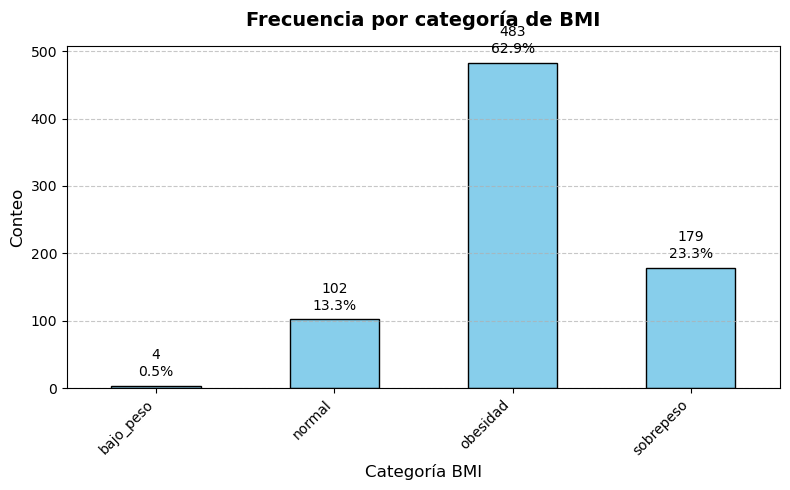

In [9]:


import matplotlib.pyplot as plt

# Conteos y porcentajes
counts = df['bmi_cat'].value_counts().sort_index()
total = counts.sum()

# Crear figura
plt.figure(figsize=(8,5))  # 🔹 tamaño más amplio
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')  # 🔹 color suave y bordes

# Título y etiquetas
plt.title('Frecuencia por categoría de BMI', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Categoría BMI', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

# 🔹 Rotación y alineación del texto en el eje X
plt.xticks(rotation=45, ha='right')

# Etiquetas encima de cada barra
for p in ax.patches:
    height = p.get_height()
    pct = 100 * height / total if total else 0
    ax.annotate(f'{int(height)}\n{pct:.1f}%',
                (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')  # 🔹 separa el texto de la barra

# 🔹 Ajustar márgenes y cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
